In [2]:
import shutil
import os

# Specify the path to the folder you want to delete
folder_path = "resized_epilepsy_spectrograms"

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' has been deleted.")
else:
    print(f"Folder '{folder_path}' does not exist or is not a directory.")


Folder 'resized_epilepsy_spectrograms' has been deleted.


In [6]:
import os

source_folder = r"C:\Users\hp\AI driven solution for detection of neurological disorder\spectrogram_images"

if os.path.exists(source_folder):
    print(f"The folder exists: {source_folder}")
else:
    print(f"The folder does NOT exist: {source_folder}")


The folder exists: C:\Users\hp\AI driven solution for detection of neurological disorder\spectrogram_images


In [7]:
import shutil
import os

# Source and destination paths
source_folder = r"C:\Users\hp\AI driven solution for detection of neurological disorder\spectrogram_images"
destination_folder = os.path.join(os.getcwd(), os.path.basename(source_folder))

# Attempt to copy the folder
try:
    shutil.copytree(source_folder, destination_folder)
    print(f"Folder '{source_folder}' successfully copied to '{destination_folder}'.")
except FileExistsError:
    print(f"The folder already exists at '{destination_folder}'.")
except Exception as e:
    print(f"An error occurred during copying: {e}")


The folder already exists at 'C:\Users\hp\InternshipReserch\spectrogram_images'.


In [8]:
import os

# Specify the path to the copied folder in the current directory
current_folder = os.getcwd()  # Current working directory
copied_folder_name = "spectrogram_images"  # Name of the copied folder
folder_path = os.path.join(current_folder, copied_folder_name)

# Initialize a counter
image_count = 0

# Supported image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Loop through the folder and count image files
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(image_extensions):  # Check for image file extensions
            image_count += 1

print(f"Total number of images in '{folder_path}': {image_count}")


Total number of images in 'C:\Users\hp\InternshipReserch\spectrogram_images': 11501


In [9]:
import os

# Specify the path to the copied folder in the current directory
current_folder = os.getcwd()  # Current working directory
copied_folder_name = "schizophrenia_spectrogram_images"  # Name of the copied folder
folder_path = os.path.join(current_folder, copied_folder_name)

# Initialize a counter
image_count = 0

# Supported image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Loop through the folder and count image files
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(image_extensions):  # Check for image file extensions
            image_count += 1

print(f"Total number of images in '{folder_path}': {image_count}")


Total number of images in 'C:\Users\hp\InternshipReserch\schizophrenia_spectrogram_images': 5041


In [11]:
import os
import random
import shutil

# Define the directories
schizophrenia_folder = 'schizophrenia_spectrogram_images'
epilepsy_folder = 'spectrogram_images'

# Create folders for the sampled images
sample_schizophrenia_folder = 'schizophrenia_sample'
sample_epilepsy_folder = 'epilepsy_sample'

# Create sample directories if they don't exist
os.makedirs(sample_schizophrenia_folder, exist_ok=True)
os.makedirs(sample_epilepsy_folder, exist_ok=True)

# Get all filenames in each folder, excluding hidden files/folders like .ipynb_checkpoints
schizophrenia_files = [f for f in os.listdir(schizophrenia_folder) if not f.startswith('.')]
epilepsy_files = [f for f in os.listdir(epilepsy_folder) if not f.startswith('.')]

# Randomly select 2000 images
sampled_schizophrenia_files = random.sample(schizophrenia_files, 2000)
sampled_epilepsy_files = random.sample(epilepsy_files, 2000)

# Copy selected files to the new folders
for file in sampled_schizophrenia_files:
    shutil.copy(os.path.join(schizophrenia_folder, file), sample_schizophrenia_folder)

for file in sampled_epilepsy_files:
    shutil.copy(os.path.join(epilepsy_folder, file), sample_epilepsy_folder)

print("Sampled 2000 images from each folder.")


Sampled 2000 images from each folder.


In [1]:
import os
import numpy as np
import cv2
import pywt
from scipy.stats import skew
import matplotlib.pyplot as plt
from skimage import feature
import glob

def extract_wavelet_features(image, wavelet='db4', level=2):
    """
    Extract wavelet features using Discrete Wavelet Transform (DWT).
    Reduce the level to 2 and use float32 for memory efficiency.
    """
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    features = []
    for coeff in coeffs:
        if isinstance(coeff, tuple):  # (cA, (cH, cV, cD))
            for c in coeff:
                features.extend(c.flatten().astype(np.float32))  # Use float32 for memory efficiency
        else:  # Approximation coefficients (cA)
            features.extend(coeff.flatten().astype(np.float32))  # Use float32 for memory efficiency
    return features

def extract_statistical_features(image):
    """
    Extract basic statistical features: mean, std, skewness, and energy.
    """
    mean = np.mean(image)
    std = np.std(image)
    skewness = skew(image.flatten())
    energy = np.sum(np.square(image))
    return [mean, std, skewness, energy]

def process_images_in_batches(folder_path, num_images=2000, batch_size=200, target_size=(256, 256)):
    """
    Process images in batches, reduce memory usage by resizing images and using smaller batches.
    """
    files = glob.glob(os.path.join(folder_path, '*.png'))  # Adjust if image format is different
    selected_files = np.random.choice(files, num_images, replace=False)

    all_features = []
    for i in range(0, num_images, batch_size):
        batch_files = selected_files[i:i+batch_size]
        batch_features = []

        for file in batch_files:
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Resize image to reduce memory usage
                img_resized = cv2.resize(img, target_size)
                # Apply DWT for feature extraction
                wavelet_features = extract_wavelet_features(img_resized)
                # Statistical features of the image
                stats_features = extract_statistical_features(img_resized)
                # Combine both wavelet and statistical features
                combined_features = wavelet_features + stats_features
                batch_features.append(combined_features)

        all_features.extend(batch_features)
        print(f"Processed batch {i // batch_size + 1} of {num_images // batch_size}...")

    return np.array(all_features)

# Folder path for schizophrenia images 
schizophrenia_folder = 'schizophrenia_sample'

# Extract features in batches for schizophrenia dataset
schizophrenia_features = process_images_in_batches(schizophrenia_folder, num_images=2000)

# Check the shape of the extracted features
print(f"Schizophrenia feature shape: {schizophrenia_features.shape}")


Processed batch 1 of 10...
Processed batch 2 of 10...
Processed batch 3 of 10...
Processed batch 4 of 10...
Processed batch 5 of 10...
Processed batch 6 of 10...
Processed batch 7 of 10...
Processed batch 8 of 10...
Processed batch 9 of 10...
Processed batch 10 of 10...
Schizophrenia feature shape: (2000, 70531)


In [2]:
epilepsy_folder = 'epilepsy_sample'

# Extract features in batches for schizophrenia dataset
epilepsy_features = process_images_in_batches(schizophrenia_folder, num_images=2000)

# Check the shape of the extracted features
print(f"Epilepsy feature shape: {epilepsy_features.shape}")


Processed batch 1 of 10...
Processed batch 2 of 10...
Processed batch 3 of 10...
Processed batch 4 of 10...
Processed batch 5 of 10...
Processed batch 6 of 10...
Processed batch 7 of 10...
Processed batch 8 of 10...
Processed batch 9 of 10...
Processed batch 10 of 10...
Epilepsy feature shape: (2000, 70531)


In [3]:
from sklearn.preprocessing import StandardScaler

# Combine the schizophrenia and epilepsy features
X_combined = np.vstack((schizophrenia_features, epilepsy_features))  # Shape: (4000, 70531)

# Standardize the features
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)


In [4]:
# Check the mean and standard deviation of the standardized data
mean = np.mean(X_combined_scaled, axis=0)  # Mean of each feature
std_dev = np.std(X_combined_scaled, axis=0)  # Standard deviation of each feature

print(f"Mean of each feature: {mean[:5]}")  # Print first 5 features' mean
print(f"Standard deviation of each feature: {std_dev[:5]}")  # Print first 5 features' std_dev


Mean of each feature: [0. 0. 0. 0. 0.]
Standard deviation of each feature: [0. 0. 0. 0. 0.]


In [5]:
print(f"First few rows of X_combined: \n{X_combined[:5, :5]}")  # Show first 5 rows and columns


First few rows of X_combined: 
[[1020. 1020. 1020. 1020. 1020.]
 [1020. 1020. 1020. 1020. 1020.]
 [1020. 1020. 1020. 1020. 1020.]
 [1020. 1020. 1020. 1020. 1020.]
 [1020. 1020. 1020. 1020. 1020.]]


In [6]:
# Check a single image and its extracted features
file = 'epilepsy_sample/spectrogram_1001_label_4.png'  # Provide a path to one of the spectrogram images
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

# Extract features from this single image
wavelet_features = extract_wavelet_features(img)
stat_features = extract_statistical_features(img)

# Print the extracted features
print("Wavelet Features:", wavelet_features[:5])  # Print the first 5 features
print("Statistical Features:", stat_features)  # Print all statistical features


Wavelet Features: [1020.0, 1020.0, 1020.0, 1020.0, 1020.0]
Statistical Features: [162.668688, 80.91895839887373, 0.041481632261257305, 33631702]


In [7]:
# Remove constant features (where std == 0)
non_constant_features = np.std(X_combined, axis=0) != 0
X_filtered = X_combined[:, non_constant_features]


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_filtered)


In [9]:
# Check the new shape and some statistics of the processed data
print(f"Processed data shape: {X_standardized.shape}")
print(f"Mean of each feature after standardization: {np.mean(X_standardized, axis=0)}")
print(f"Standard deviation of each feature after standardization: {np.std(X_standardized, axis=0)}")


Processed data shape: (4000, 38505)
Mean of each feature after standardization: [-1.49058202e-09  1.25284269e-09  1.36761735e-09 ...  4.69668748e-15
 -4.19220214e-16 -1.08890674e-15]
Standard deviation of each feature after standardization: [1. 1. 1. ... 1. 1. 1.]


In [10]:
from sklearn.decomposition import PCA

In [11]:
# Apply PCA with 80% variance retention
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(X_standardized)

# Check explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_)}")

# Check shape after PCA
print(f"Shape of data after PCA: {X_pca.shape}")

Explained variance ratio: [0.04135045 0.011481   0.00924998 0.00747565 0.00705262 0.00651845
 0.00629545 0.00520238 0.0047491  0.00464976 0.00452012 0.0044115
 0.0043099  0.00410011 0.00396178 0.00391113 0.00362394 0.00354038
 0.00340635 0.00326232 0.00319914 0.00312103 0.00303817 0.00291387
 0.00285648 0.00282648 0.00274733 0.0026929  0.00264907 0.00257731
 0.00254273 0.0025072  0.0024886  0.00246537 0.00244592 0.00242337
 0.0023854  0.0023551  0.00233742 0.00232168 0.00229509 0.00228367
 0.00223338 0.0022144  0.00219696 0.00217783 0.00216413 0.00215952
 0.00214657 0.00212556 0.00210126 0.00210046 0.00206574 0.0020612
 0.00204294 0.00202792 0.00201863 0.00199925 0.00198975 0.00198392
 0.0019799  0.00196457 0.00194904 0.00193749 0.00192748 0.00192703
 0.00190725 0.00189258 0.00187985 0.0018705  0.00185895 0.00185132
 0.0018477  0.00183882 0.00182163 0.0018178  0.00180194 0.00179533
 0.00178963 0.0017806  0.0017704  0.00176373 0.00175276 0.00174557
 0.00173721 0.00173325 0.00172443 0.00

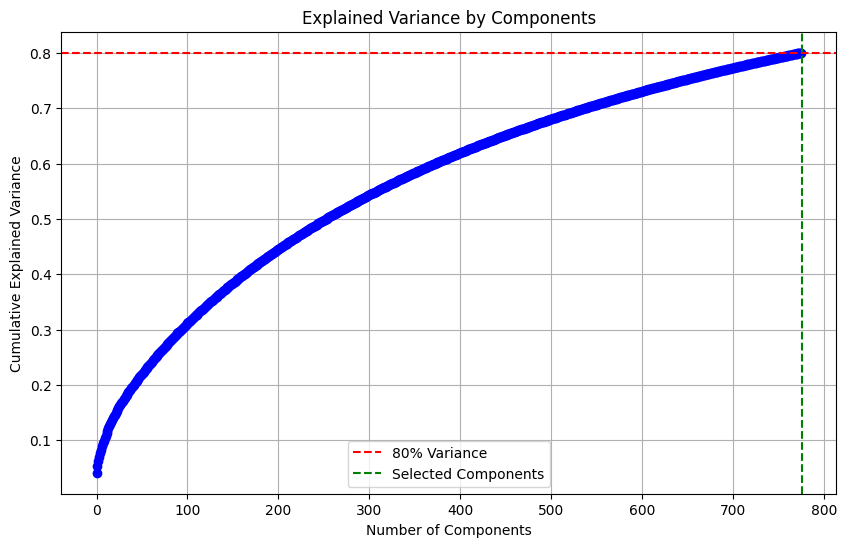

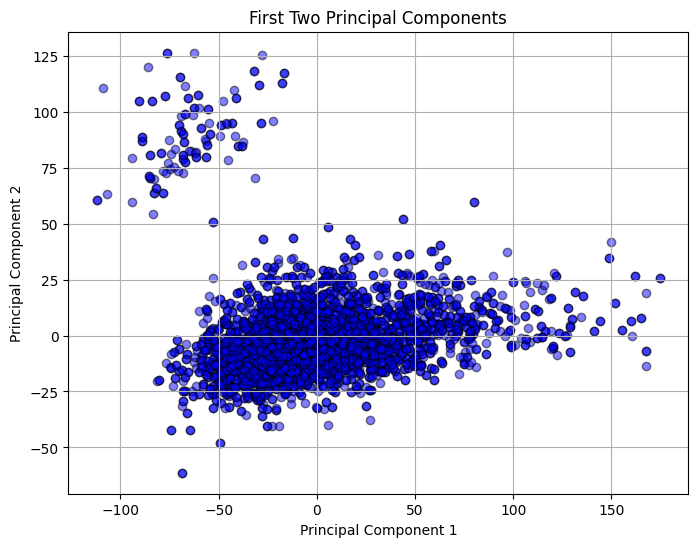

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.axvline(x=len(pca.components_), color='g', linestyle='--', label='Selected Components')
plt.legend()
plt.grid()
plt.show()

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', alpha=0.5)
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [13]:
#preparing dataset
import numpy as np

# Assuming X_pca is your PCA-transformed data
time_steps = 10  # Number of time steps to consider
features = X_pca.shape[1]  # Number of features after PCA

# Reshape the data for RNN/LSTM
X_reshaped = []
for i in range(len(X_pca) - time_steps + 1):
    X_reshaped.append(X_pca[i:i+time_steps])

X_reshaped = np.array(X_reshaped)  # Convert list to NumPy array
print("Shape of reshaped data:", X_reshaped.shape)


Shape of reshaped data: (3991, 10, 776)


In [16]:
# Create corresponding labels
X_schizophrenia = schizophrenia_features  # Shape: (2000, 70531)
X_epilepsy = epilepsy_features  # Shape: (2000, 70531)
y_schizophrenia = np.zeros(X_schizophrenia.shape[0])  # Label for schizophrenia: 0
y_epilepsy = np.ones(X_epilepsy.shape[0])  # Label for epilepsy: 1

In [17]:

y_combined = np.concatenate((y_schizophrenia, y_epilepsy))  

In [18]:
from sklearn.model_selection import train_test_split

# Assuming you also have labels (y)
# Assuming y_combined is a 1D array or list with the labels
y_reshaped = y_combined[time_steps - 1:]  # Align labels with reshaped data
  # Adjust labels to match reshaped data
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_reshaped, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (2793, 10, 776) (2793,)
Validation data shape: (599, 10, 776) (599,)
Test data shape: (599, 10, 776) (599,)


In [20]:
from tensorflow.keras.layers import Input

# Build the LSTM model
model = Sequential()

# Add Input layer to specify input shape
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Add Dense layer for classification
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer with softmax activation for multi-class classification
model.add(Dense(1, activation='sigmoid'))  # If it's a binary classification task

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │         215,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,409 (849.25 KB)

 Trainable params: 217,409 (849.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5054 - loss: 1.7534 - val_accuracy: 0.5175 - val_loss: 1.0477
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6812 - loss: 0.7226 - val_accuracy: 0.5159 - val_loss: 0.9466
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7777 - loss: 0.4996 - val_accuracy: 0.5476 - val_loss: 0.9185
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8379 - loss: 0.3864 - val_accuracy: 0.5826 - val_loss: 0.8879
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8942 - loss: 0.2552 - val_accuracy: 0.6427 - val_loss: 0.8147
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9364 - loss: 0.1806 - val_accuracy: 0.6912 - val_loss: 0.7117
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9524 - loss: 0.1234 - val_accuracy: 0.7563 - val_loss: 0.5955
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9730 - loss: 0.0767 - val_accuracy: 0.8364 - val_

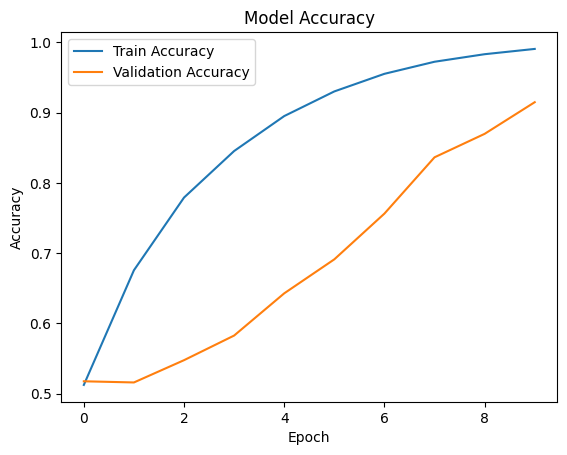

In [22]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


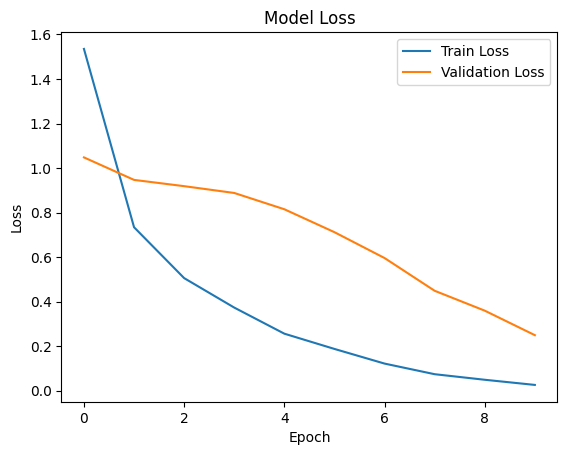

In [23]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9176 - loss: 0.2292
Test Accuracy: 91.99%


In [25]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Converting probabilities to binary predictions (0 or 1)

# Print classification report
print(classification_report(y_test, y_pred))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       303
         1.0       0.92      0.92      0.92       296

    accuracy                           0.92       599
   macro avg       0.92      0.92      0.92       599
weighted avg       0.92      0.92      0.92       599



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


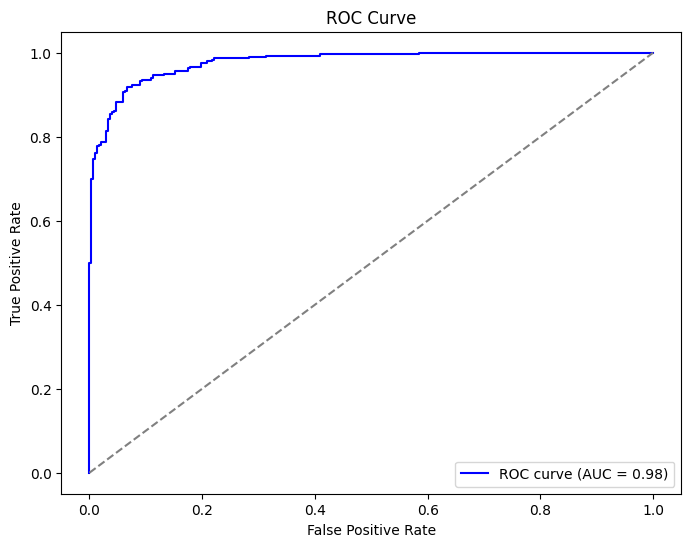

AUC: 0.98


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Make predictions on the test data
y_pred_prob = model.predict(X_test)  # Get the probability predictions (not thresholded)
y_pred_prob = y_pred_prob.flatten()  # Flatten in case it's not already 1D

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print(f"AUC: {auc:.2f}")
